### EV Charging Demand Forecasting in India

In [27]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Step 2: Define Cities and Station Info

In [28]:
cities = ['Chennai', 'Bengaluru', 'Delhi']
station_types = ['Fast', 'Normal']
start_date = datetime(2025, 6, 1)
num_days = 30

stations = []
for city in cities:
    for i, stype in enumerate(station_types):
        stations.append({
            'Station_ID': f"{city[:3].upper()}_{stype}_{i+1}",
            'City': city,
            'Type': stype
        })

stations_df = pd.DataFrame(stations)
stations_df.head()


,Station_ID,City,Type
0,CHE_Fast_1,Chennai,Fast
1,CHE_Normal_2,Chennai,Normal
2,BEN_Fast_1,Bengaluru,Fast
3,BEN_Normal_2,Bengaluru,Normal
4,DEL_Fast_1,Delhi,Fast


# Step 3: Simulate Usage Data

In [29]:
usage_records = []

for _, row in stations_df.iterrows():
    for day in range(num_days):
        date = start_date + timedelta(days=day)
        base_usage = random.randint(40, 90) if row['Type'] == 'Fast' else random.randint(20, 50)
        weather_factor = random.uniform(0.7, 1.2)
        usage = int(base_usage * weather_factor)

        usage_records.append({
            'Date': date.strftime('%Y-%m-%d'),
            'Station_ID': row['Station_ID'],
            'City': row['City'],
            'Type': row['Type'],
            'Usage_Count': usage
        })

usage_df = pd.DataFrame(usage_records)
usage_df.to_csv("simulated_ev_usage_india.csv", index=False)
usage_df.head()


,Date,Station_ID,City,Type,Usage_Count
0,2025-06-01,CHE_Fast_1,Chennai,Fast,85
1,2025-06-02,CHE_Fast_1,Chennai,Fast,46
2,2025-06-03,CHE_Fast_1,Chennai,Fast,78
3,2025-06-04,CHE_Fast_1,Chennai,Fast,41
4,2025-06-05,CHE_Fast_1,Chennai,Fast,28


# Step 4: Simulate Weather Data

In [30]:
weather_data = []

for city in cities:
    for day in range(num_days):
        date = start_date + timedelta(days=day)
        temp = random.randint(26, 38) if city == 'Chennai' else random.randint(22, 35)
        rain = round(random.uniform(0, 20), 1)
        condition = random.choice(['Sunny', 'Cloudy', 'Rainy', 'Clear'])

        weather_data.append({
            'Date': date.strftime('%Y-%m-%d'),
            'City': city,
            'Temperature(C)': temp,
            'Rainfall(mm)': rain,
            'Condition': condition
        })

weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("weather_chennai_bangalore_delhi.csv", index=False)
weather_df.head()


,Date,City,Temperature(C),Rainfall(mm),Condition
0,2025-06-01,Chennai,28,5.4,Rainy
1,2025-06-02,Chennai,27,12.9,Rainy
2,2025-06-03,Chennai,30,3.7,Sunny
3,2025-06-04,Chennai,29,2.5,Cloudy
4,2025-06-05,Chennai,27,19.9,Clear


# Step 5: Merge Usage and Weather Data

In [31]:
# Step 5: Merge Usage and Weather Data
merged_df = pd.merge(usage_df, weather_df, on=['Date', 'City'], how='left')
merged_df.to_csv("merged_ev_usage_weather.csv", index=False)
merged_df.head()

,Date,Station_ID,City,Type,Usage_Count,Temperature(C),Rainfall(mm),Condition
0,2025-06-01,CHE_Fast_1,Chennai,Fast,85,28,5.4,Rainy
1,2025-06-02,CHE_Fast_1,Chennai,Fast,46,27,12.9,Rainy
2,2025-06-03,CHE_Fast_1,Chennai,Fast,78,30,3.7,Sunny
3,2025-06-04,CHE_Fast_1,Chennai,Fast,41,29,2.5,Cloudy
4,2025-06-05,CHE_Fast_1,Chennai,Fast,28,27,19.9,Clear


# Step 6: Data Preprocessing

In [32]:

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df['Type_Encoded'] = merged_df['Type'].map({'Fast': 1, 'Normal': 0})

merged_df = pd.get_dummies(merged_df, columns=['Condition'])

merged_df = merged_df.sort_values(by=['City', 'Station_ID', 'Date'])

print("Missing Values:\n", merged_df.isnull().sum())

merged_df.head()


Missing Values:
 Date                0
Station_ID          0
City                0
Type                0
Usage_Count         0
Temperature(C)      0
Rainfall(mm)        0
Type_Encoded        0
Condition_Clear     0
Condition_Cloudy    0
Condition_Rainy     0
Condition_Sunny     0
dtype: int64


,Date,Station_ID,City,Type,Usage_Count,Temperature(C),Rainfall(mm),Type_Encoded,Condition_Clear,Condition_Cloudy,Condition_Rainy,Condition_Sunny
60,2025-06-01,BEN_Fast_1,Bengaluru,Fast,80,32,18.2,1,False,True,False,False
61,2025-06-02,BEN_Fast_1,Bengaluru,Fast,64,30,0.3,1,True,False,False,False
62,2025-06-03,BEN_Fast_1,Bengaluru,Fast,82,22,6.2,1,False,True,False,False
63,2025-06-04,BEN_Fast_1,Bengaluru,Fast,74,25,15.7,1,True,False,False,False
64,2025-06-05,BEN_Fast_1,Bengaluru,Fast,87,30,5.0,1,True,False,False,False


#Step 7: Feature Engineering

In [33]:
merged_df['Day_of_Week'] = merged_df['Date'].dt.day_name()

dow_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
merged_df['Day_Num'] = merged_df['Day_of_Week'].map(dow_mapping)


# Step 8: Quick Summary

In [34]:
print("EV Usage Summary:")
print(usage_df.describe())

print("\nWeather Data Summary:")
print(weather_df.describe())

print("\nMerged Data Preview:")
print(merged_df.head())


EV Usage Summary:
       Usage_Count
count   180.000000
mean     45.494444
std      19.834369
min      14.000000
25%      29.000000
50%      41.500000
75%      57.000000
max     103.000000

Weather Data Summary:
       Temperature(C)  Rainfall(mm)
count       90.000000     90.000000
mean        29.200000     10.077778
std          4.462578      5.843229
min         22.000000      0.300000
25%         25.250000      5.325000
50%         29.000000      9.750000
75%         33.000000     15.600000
max         38.000000     19.900000

Merged Data Preview:
         Date  Station_ID       City  Type  Usage_Count  Temperature(C)  \
60 2025-06-01  BEN_Fast_1  Bengaluru  Fast           80              32   
61 2025-06-02  BEN_Fast_1  Bengaluru  Fast           64              30   
62 2025-06-03  BEN_Fast_1  Bengaluru  Fast           82              22   
63 2025-06-04  BEN_Fast_1  Bengaluru  Fast           74              25   
64 2025-06-05  BEN_Fast_1  Bengaluru  Fast           87            

# Step 9: Setup & Train the Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


features = ['Temperature(C)', 'Rainfall(mm)', 'Type_Encoded', 'Day_Num'] + \
           [col for col in merged_df.columns if col.startswith('Condition_')]
target = 'Usage_Count'

X = merged_df[features]
y = merged_df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

# Step 10: Evaluate Model Performance

In [36]:
# Predict
y_pred = rf_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")



Random Forest MAE: 12.21
Random Forest R² Score: 0.31


# Step 11: Forecast Future EV Demand

In [37]:
future_input = pd.DataFrame([{
    'Temperature(C)': 34,
    'Rainfall(mm)': 0.0,
    'Type_Encoded': 1,        # Fast station
    'Day_Num': 5,             # Saturday
    'Condition_Clear': 0,
    'Condition_Cloudy': 0,
    'Condition_Rainy': 0,
    'Condition_Sunny': 1
}])

predicted_usage = rf_model.predict(future_input)
print(f"Forecasted Usage Count: {predicted_usage[0]:.0f}")



Forecasted Usage Count: 56


# Time Series Forecasting (using ARIMA)

# Step 1: Aggregate Usage Data by Date

In [38]:
daily_usage = merged_df.groupby('Date')['Usage_Count'].sum().reset_index()
daily_usage = daily_usage.set_index('Date')
daily_usage = daily_usage.asfreq('D')

daily_usage = daily_usage.fillna(method='ffill')
daily_usage.head()


/tmp/ipython-input-38-2560149007.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_usage = daily_usage.fillna(method='ffill')


,Usage_Count
Date,
2025-06-01,312
2025-06-02,219
2025-06-03,299
2025-06-04,295
2025-06-05,251


# Step 2: Plot Time Series


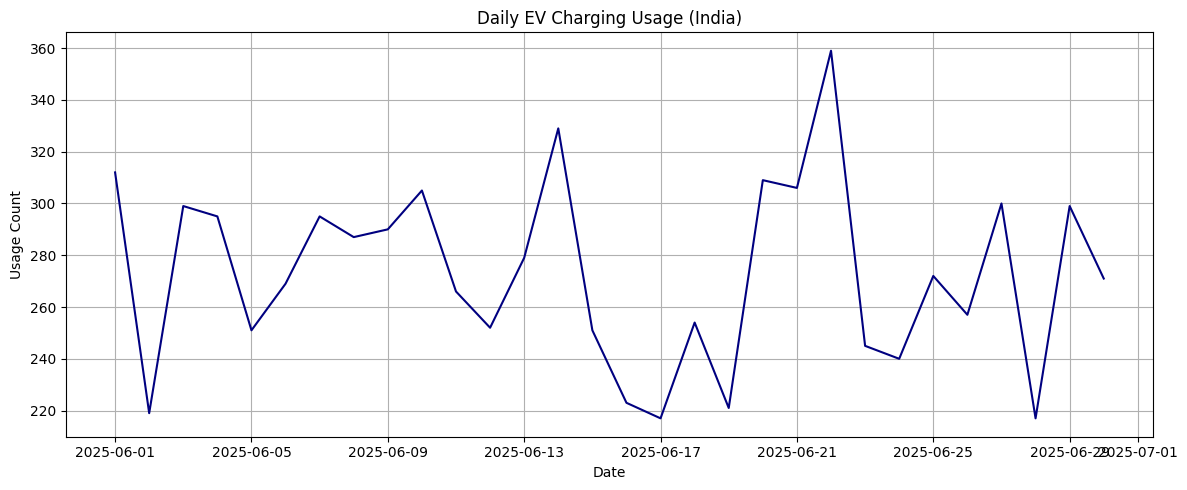

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_usage.index, daily_usage['Usage_Count'], color='navy')
plt.title("Daily EV Charging Usage (India)")
plt.xlabel("Date")
plt.ylabel("Usage Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 3: Train ARIMA Model

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_usage['Usage_Count'], order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            Usage_Count   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -146.305
Date:                Tue, 22 Jul 2025   AIC                            302.611
Time:                        19:33:59   BIC                            309.447
Sample:                    06-01-2025   HQIC                           304.752
                         - 06-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9203      0.215     -4.287      0.000      -1.341      -0.500
ar.L2         -0.0075      0.199     -0.038      0.970      -0.397       0.382
ma.L1          0.0002    123.786   1.45e-06      1.0

# Step 4: Forecast Next 15 Days

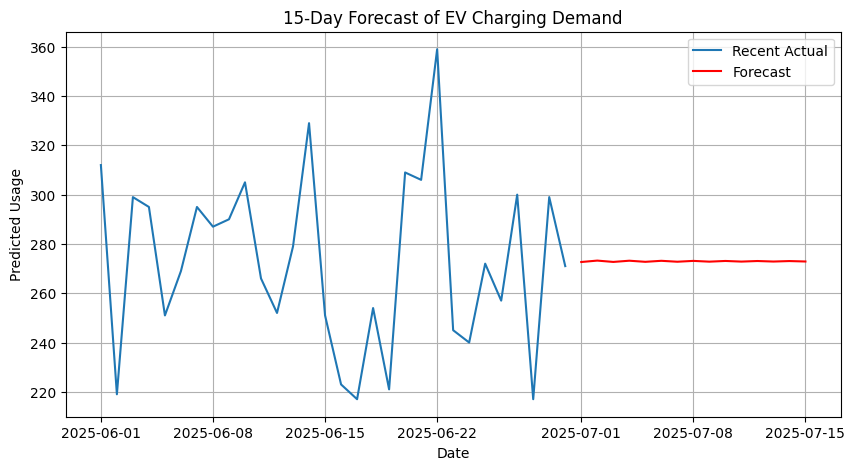

In [41]:
forecast = model_fit.forecast(steps=15)

plt.figure(figsize=(10, 5))
plt.plot(daily_usage.index[-30:], daily_usage['Usage_Count'].tail(30), label="Recent Actual")
plt.plot(pd.date_range(daily_usage.index[-1] + pd.Timedelta(days=1), periods=15), forecast, color='red', label="Forecast")
plt.title("15-Day Forecast of EV Charging Demand")
plt.xlabel("Date")
plt.ylabel("Predicted Usage")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import pickle

with open("rf_ev_forecast_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [48]:
!ngrok config add-authtoken 30FFUhZzvmpQPs8QPOa0ByRdMux_2DyuUeGpcXrrR14c1dvY3


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [51]:
!pip install streamlit pyngrok --quiet

# Write updated Streamlit app
with open("ev_forecast_app.py", "w") as f:
    f.write("""
import streamlit as st
import pickle
import numpy as np

st.title("EV Charging Demand Forecasting 🇮🇳")

# Load model
with open("ev_random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# User Inputs
st.sidebar.header("Input Parameters")
day_of_week = st.sidebar.slider("Day of Week (0=Mon, 6=Sun)", 0, 6, 3)
hour = st.sidebar.slider("Hour of Day", 0, 23, 12)
temperature = st.sidebar.slider("Temperature (°C)", 10, 45, 30)
holiday = st.sidebar.selectbox("Is it a holiday?", ["No", "Yes"])
is_holiday = 1 if holiday == "Yes" else 0
prev_hour_usage = st.sidebar.slider("Previous Hour Usage", 0, 100, 30)

# Combine features (5 inputs)
features = np.array([[day_of_week, hour, temperature, is_holiday, prev_hour_usage]])
predicted_usage = model.predict(features)[0]

st.subheader("📈 Predicted Charging Usage Count:")
st.success(f"{int(predicted_usage)} vehicles")
""")

# Start Streamlit with ngrok
import threading
import time
from pyngrok import ngrok

def run():
    !streamlit run ev_forecast_app.py --server.port 8501 > /dev/null 2>&1

thread = threading.Thread(target=run)
thread.start()
time.sleep(5)

public_url = ngrok.connect(8501)
print("🚀 Your app is live at:", public_url)


🚀 Your app is live at: NgrokTunnel: "https://be29e83501dd.ngrok-free.app" -> "http://localhost:8501"
